<a href="https://colab.research.google.com/github/Ysop1264/TMDLWeek2/blob/main/TMDL_2024_25_Assignment_3%2C_Ans_636866.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Turing Machine and Deep Learning 2023

## Assignment Unupervised ML

This notebook is meant for you to review and reflect on the content of Lecture 3, which was mainly about unsupervised learning problems. As with last week, this notebook should not be too much quantitative work (lines of code) but keep in mind that running this notebook may take a longer time than you may be used to for python programs (*training good models take time!*)

### Handing in your Assignment

Git is an invaluable resource to researchers and developers, and thus for this course, all course material will be (additionally) shared on GitHub. Though there is a tiny bit of a learning curve, this is worth the effort. To hand in your assignment (applicable to all weeks):

1. Create a folder called "Week 2" and copy this notebook and any other files or data that may be needed.
2. Finish the notebook and commit and push regularly. Your final commit before the deadline will be graded.


### Grading

Each one of the (sub-)questions below will be graded either 0 (insufficient), 1 (sufficient) or 2 (good). If $N$ is the number of sub-questions, and $p_i$ is your score for sub-question $i$, your total grade $G$ for this assignment is:
$$G=\frac{1}{2 N}\sum_{i=0}^{N}p_i$$

In [1]:
# load common libraries
import numpy as np                 # maths
import matplotlib.pyplot as plt    # plotting
import pandas as pd                # data manipulation
from tqdm import tqdm              # loading bar
from time import perf_counter      # timer

# Q1 Loading and preprocessing data

In this repository, you should find a file called `tmdb_5000_movies.csv` which is information from a subset of movies on The Movie Database.

### Q.1.1
Use pandas to read in the csv file (refer to [read_csv](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) if you're unfamiliar).

In [16]:
df = pd.read_csv("/content/tmdb_5000_movies.csv")
df

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,220000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",NaN,9367,"[{""id"": 5616, ""name"": ""united states\u2013mexi...",es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,"[{""name"": ""Columbia Pictures"", ""id"": 5}]","[{""iso_3166_1"": ""MX"", ""name"": ""Mexico""}, {""iso...",1992-09-04,2040920,81.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238
4799,9000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",NaN,72766,[],en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,[],[],2011-12-26,0,85.0,[],Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5
4800,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",http://www.hallmarkchannel.com/signedsealeddel...,231617,"[{""id"": 248, ""name"": ""date""}, {""id"": 699, ""nam...",en,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,"[{""name"": ""Front Street Pictures"", ""

View information about the dataset including datatypes and null values

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

**Q.1.1.2** What columns have null values above? How would you be able to estimate the missing values?

homepage, overview, release_date, runtime, and tagline columns have missing values. Especially, homepage and taglines which have a substantial amount - 3091 and 844 respectively. But, since htese aren't neccessary for our analysis, they can filled with "no overview" and "no tagline" or just be dropped so as to have perfectly clean data.
The overview column has 3 missing row values, these can be filled with something like "no overview available" as it is also unlikely to impact final results, considering size of the dataset.
The missing release date (only 1 value) can be estimated by looking for alternative soruces of info or estimating based on release year. For the 2 missing runtimes, they can be fillled with median values of runtime within their genre as a decent estimate.

### Q1.2
For this notebook, we're only interested in a few columns, specifically title, overview and genres. Set df to only contain those columns.

In [18]:
df = df[["title", "overview", "genres"]]
df.info() # print out df info to verify

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   title     4803 non-null   object
 1   overview  4800 non-null   object
 2   genres    4803 non-null   object
dtypes: object(3)
memory usage: 112.7+ KB


### Q1.3
We see that some movies do not have an overview. Drop them from the table and reset the index (set `drop=True`).

In [19]:
df = df.dropna(subset=["overview"]) # drop na values
df = df.reset_index(drop=True) # reset index
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4800 entries, 0 to 4799
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   title     4800 non-null   object
 1   overview  4800 non-null   object
 2   genres    4800 non-null   object
dtypes: object(3)
memory usage: 112.6+ KB


# Q2 One-hot encodings
The following code processes the genres (which you see above are list of dictionaries) and encodes them into one-hot labels.

Remember, since we cannot do maths on text strings, we must change these words to numbers. Here, we create one-hot encodings for the genres. Assume we have three genres $[G_1, G_2, G_3]$. If a movie $M_1$ is tagged with genre $G_1$, the encoding is $[1,0,0]$. If another movie $M_2$ is tagged with $G2$, the encoding becomes $[0,1,0]$. Other encodings are possible as well, but one-hot encoding quite common and useful for many other tasks. In this case, if a movie is tagged with more than one genre, we'll just take a random one and encode that into a one-hot label.

### Q2.1 Processing genres

Finish the following code that processes genres into one-hot encodings.

In [24]:
np.random.seed(0)

def process_genre_string(gs):
    """ Processes genres into a single item from a list"""
    gs = eval(gs)
    gs = [x['name'] for x in gs]
    genre = "Unknown"
    if gs:
        genre = np.random.choice(gs) # choose random entry
    return genre

# TODO: Fill in
def encode_labels(label, unique_labels):
    """ Encodes text labels into a one-hot encoded list
        with possibly more than one one-hot per list.
        :param label: the label you want to one-hot encode
        :unique_labels: the vocabulary
    """
    out = np.zeros(len(unique_labels))
    index = unique_labels.index(label)
    out[index] = 1
    return out

# save genres
processed_genres = []
for index, row in df.iterrows():
    processed_genres.append(process_genre_string(row["genres"]))

# sort and remove duplicates to get vocabulary
unique_genres = sorted(list(set(processed_genres)))

# add to dataframe as new column
df["proc_genres"] = processed_genres

# one-hot encode genres
enocded_labels = []
for index, row in tqdm(df.iterrows(), total=len(df)):
    enocded_labels.append(encode_labels(row["proc_genres"], unique_genres))

df["one_hot_genres"] = enocded_labels

100%|██████████| 4800/4800 [00:00<00:00, 11530.78it/s]


Verify that one-hot encodings are indeed as expected

In [25]:
df["one_hot_genres"][0]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0.])

### Q2.2 Processing Overviews
Next, we process the overviews. First, we remove all punctuation for the sake of simplicity and change each overview to use only lowercase. Then we need to see how long the overviews are in terms of numbers of words. We can do this with a histogram.

**Q2.2.1** Finish the following code

100%|██████████| 4707/4707 [00:00<00:00, 13647.46it/s]


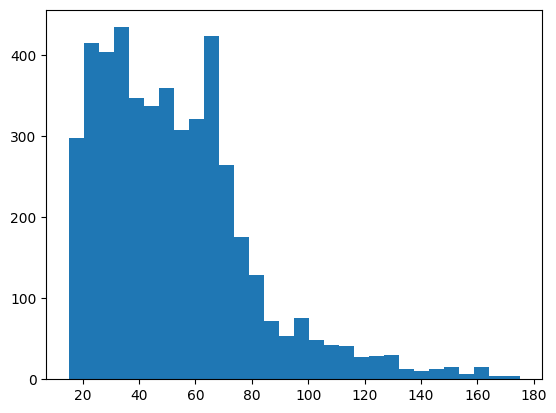

In [49]:
import re
def remove_punctuation(text):
    """ Only retains letters, numbers, underscores and whitespace """
    pattern = r'[^\w\s]'
    return re.sub(pattern, '', text)

processed_overviews = []

# loop over df, remove punctuation, make words lowercase and add it to a new column
for index, row in tqdm(df.iterrows(), total=len(df)):
    overview = row["overview"]
    overview = remove_punctuation(overview)
    overview = overview.lower()
    overview = overview.split()
    processed_overviews.append(overview)
df["proc_overview"] = processed_overviews

# get the word lengths of each overview and store it in a list
overview_lens = []
for overview in processed_overviews:
    overview_lens.append(len(overview)) #Already split earlier

# for the sake of simplicity, add these values as a column to the df
df["overview_len"] = overview_lens
plt.hist(overview_lens, bins=30)
plt.show()

**Q2.2.2** What is the shortest overview? What is the longest? In the next step, we need to decide on a standard length of all overviews -- this means dropping overviews less than some value, and truncating longer ones. What length would you choose to minimize the number of movies dropped and maximize the information (words) stored in the overviews?

Shortest overview length: 15
Longest overview length: 175


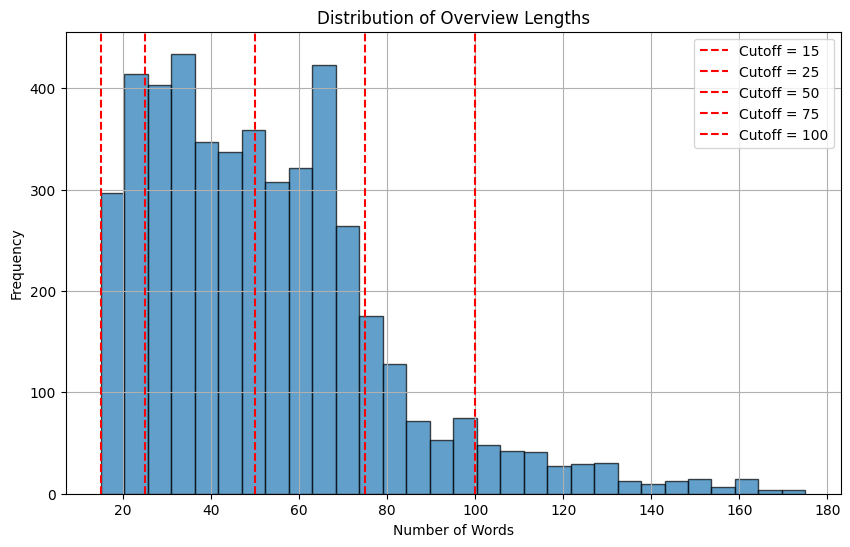

Cutoff =  15 , Kept: 4707 , Dropped:    0 , % Kept: 100.00%
Cutoff =  25 , Kept: 4086 , Dropped:  621 , % Kept: 86.81%
Cutoff =  50 , Kept: 2303 , Dropped: 2404 , % Kept: 48.93%
Cutoff =  75 , Kept:  764 , Dropped: 3943 , % Kept: 16.23%
Cutoff = 100 , Kept:  308 , Dropped: 4399 , % Kept: 6.54%


In [50]:
print("Shortest overview length:", df["overview_len"].min())
print("Longest overview length:", df["overview_len"].max())

plt.figure(figsize=(10, 6))
plt.hist(df["overview_len"], bins=30, edgecolor='black', alpha=0.7)

cutoffs = [15, 25, 50, 75, 100]
# Trying candidate cutoffs
for cutoff in cutoffs:
    plt.axvline(cutoff, color='red', linestyle='--', label=f"Cutoff = {cutoff}")

plt.title("Distribution of Overview Lengths")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.show()

for cutoff in cutoffs:
    kept = df[df["overview_len"] >= cutoff].shape[0]
    dropped = df.shape[0] - kept
    print(f"Cutoff = {cutoff:>3} , Kept: {kept:>4} , Dropped: {dropped:>4} , % Kept: {kept / df.shape[0] * 100:.2f}%")

The shortest overview is 15 words (although dropna was used, maybe there was an empty string input). The longest overview is 175 words. Based on the above data (graph and values), we see that a cutoff of about 25 words is a sweet spot where we minimise the size of the overviews whilst not losing too much data.

### Q2.2.3
Let's choose overviews of length 15 words. What this means is we need to discard movies that have overviews less than 15 (there are other ways of dealing with it, but this should be fine for now) and truncate the higher ones to the first 15 words.

In [51]:
token_len = 15 # number of words
# only select rows where overview len is more than or equal to token_len
df = df[df["overview_len"] >= token_len]
df = df.reset_index(drop=True)

# split each proc_overview into a list of words, select the first token_len words,
# and add the list of words back into df["proc_overview"]
df["proc_overview"] = df["proc_overview"].apply(lambda x: x[:token_len])

# print to verify
print(df["proc_overview"].head())

0    [in, the, 22nd, century, a, paraplegic, marine...
1    [captain, barbossa, long, believed, to, be, de...
2    [a, cryptic, message, from, bonds, past, sends...
3    [following, the, death, of, district, attorney...
4    [john, carter, is, a, warweary, former, milita...
Name: proc_overview, dtype: object


### Q2.2.3 Finding the vocabulary length

In order to one-hot encode words, we need to find how many words there are in total, just like in the case of genres. Get all the words, remove duplicates, and sort. Find and print the length of your vocabulary.

In [52]:
# hint: store all words for all movies in a set, change it to a list and sort
vocab = set()
for overview in df["proc_overview"]:
    vocab.update(overview)

vocab = sorted(list(vocab))

vocab_len = len(vocab)
print(vocab_len)

12493


### Q2.2.4 Encoding the labels

In the case of genres, we one-hot encoded the outputs by taking a single random genre. However, an alternative method is to add up the one-hot encodings to form some kind of histogram. For example, if we have an overview "a brown dog", and our vocab is \[a brown, big, cabbage, dog, goat, cow, turkey\], the one-hot vector would be \[1,1,0,0,1,0,0,0\]. If our overview is "a big brown dog", the one-hot vector would be \[1,1,1,0,1,0,0,0\]. If our overview is "a big big brown dog", the one-hot vector would be \[1,1,2,0,1,0,0,0\]. You can use the `encode_labels` function that you defined earlier.

In [81]:
# this code is just a hint, if you want you can do it as you please
# as long as the output remains the same

# Create a mapping from word to index
match_count = 0
vocab_to_index = {word: i for i, word in enumerate(vocab)}

encoded_labels = []
for index, row in tqdm(df.iterrows(), total=len(df)):
    vector = np.zeros(vocab_len)
    for word in row["proc_overview"]:
        if word in vocab_to_index:  # Safe check
            vector[vocab_to_index[word]] = 1  # Set presence of word
            match_count += 1
        else:
            print(f"Word not found in vocab: {word}")
    encoded_labels.append(vector)


df["one_hot_overview"] = encoded_labels
df["one_hot_overview"]

100%|██████████| 4707/4707 [00:00<00:00, 9784.64it/s]


,one_hot_overview
0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
...,...
4702,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4703,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4704,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4705,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


**Q2.2.5** Each vector is a vector of floating point (64-bit) numbers. Assuming each float takes up exactly 16-bytes, how many bytes does this take to store (theoretically)?

In [57]:
num_rows = len(df)

#vocab_len defined earlier
total_bytes = num_rows * vocab_len * 16
print(f"Theoretical storage: {total_bytes:,} bytes")


Theoretical storage: 940,872,816 bytes


We know that total bytes is the product of number of vectors and the length of each vector times the space taken by each float. In our case, this gives 940872816 bytes

# Q3 Principal Component Analysis

**Q3.1** Using the overview encoded into one-hot encodings, perform PCA and plot this into a 2-D image as a scatter plot.

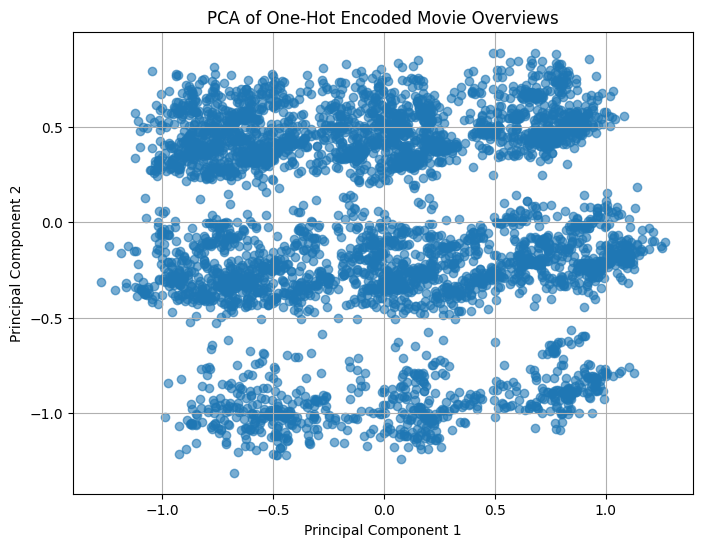

In [73]:
# import PCA decomposition class from sklearn
from sklearn.decomposition import PCA

# we did exactly this in the lecture notebook
encoded_labels = np.array(df["one_hot_overview"].tolist())

pca = PCA(n_components=2)
labels_pca = pca.fit_transform(encoded_labels)

plt.figure(figsize=(8, 6))
plt.scatter(labels_pca[:, 0], labels_pca[:, 1], alpha=0.6)
plt.title("PCA of One-Hot Encoded Movie Overviews")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.show()

**Q3.2** Do you see any interpretable structure in the above plot ("interpretable" $\rightarrow$ the patterns are explainable).

There is structure but it is not interpretable. The points are arranged in several horizontal layers or stripes across the y-axis (PC2). It is not random and could be explained as a sign that PCA is picking up on repeated structures or artifacts in the data.
The points also aren't completely uniform suggesting that some overviews may use similar words (which intuitively makes some sense)
But overall, there is no clear way to interpret the structure

**Q3.3** Quantify how much variance information a 2D PCA projection loses for this dataset.

In [74]:
explained = pca.explained_variance_ratio_
total_explained = explained.sum()
info_loss = 1 - total_explained

print(f"Variance retained in 2D: {total_explained:.4f}")
print(f"Variance lost (information loss): {info_loss:.4f}")

Variance retained in 2D: 0.0513
Variance lost (information loss): 0.9487


The current 2D PCA projection only keeps about 5% of the total information, meaning it loses approximately 95% of the total information.

**Q3.4** Plot a line graph where the y-axis is cumulative explained variance ratio and the x-axis is the number of PCA components.

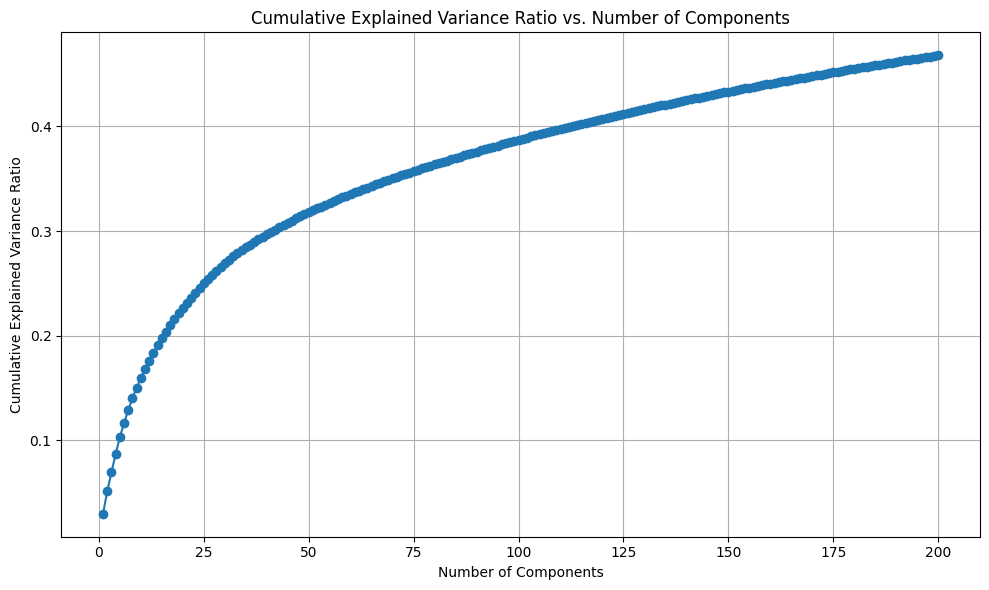

In [83]:
# Set up PCA object with the desired number of components
max_components = 200
pca = PCA(n_components=max_components)

encoded_arr = np.array(df["one_hot_overview"].tolist())

# fit transform one_hot_overview encodings
labels_pca = pca.fit_transform(encoded_arr)
# get explained variance ratio from object, store it in a list
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_ratio = np.cumsum(explained_variance_ratio)

# Plot the cumulative explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(range(1, max_components + 1), cumulative_explained_ratio, marker='o', linestyle='-')
# set up y label, x label, title
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance Ratio")
plt.title("Cumulative Explained Variance Ratio vs. Number of Components")
plt.grid(True)
plt.tight_layout()
plt.show()

**Q3.5** How many principal components do you need in order to explain 80% of the total variance in the data?

Note: don't just estimate it by eye, write some code to compute it for you.

In [86]:
# your code answer here
pca = PCA(n_components=encoded_arr.shape[0])
pca.fit(encoded_arr)
cumulative_explained_ratio = np.cumsum(pca.explained_variance_ratio_)
n_components = np.argmax(cumulative_explained_ratio >= 0.8) + 1

print(f"No. of components to explain 80% variance: {n_components}")

No. of components to explain 80% variance: 1394


According to the code the number of components required is 1394

**Q3.6** Using the number of dimensions you found in Q3.5, fit and transform your overview encodings using PCA and add it to a new column called `overview_pca` in the dataframe.

In [87]:
n_dims = 1394
pca = PCA(n_components=n_dims)
labels_pca = pca.fit_transform(encoded_arr)
df["overview_pca"] = labels_pca.tolist()

# Q4 K-Means Clustering

**Q4.1** Cluster the movies based on the features that were extracted via PCA in the last step. Set $K=20$. Add the predicted cluster into the dataframe as a new column called `cluster_kmeans`. Print out the elements of cluster number 0 from the dataframe.

In [88]:
# import KMeans class
from sklearn.cluster import KMeans

X_pca = np.array(df["overview_pca"].tolist())
# Perform K-means clustering
kmeans = KMeans(n_clusters=20)
# fit model
kmeans.fit(X_pca)

y_preds = kmeans.predict(X_pca) # get predictions
df["cluster_kmeans"] = y_preds # set predictions

# print out elements of cluster 0
cluster_0 = df[df["cluster_kmeans"] == 0]
cluster_0

,title,overview,genres,proc_genres,one_hot_genres,proc_overview,overview_len,one_hot_overview,overview_pca,cluster_kmeans
23,The Golden Compass,"After overhearing a shocking secret, precociou...","[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",Adventure,"[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[after, overhearing, a, shocking, secret, prec...",34,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.07518028915262935, 0.2914210828845094, -0.1...",0
67,Iron Man,"After being held captive in an Afghan cave, bi...","[{""id"": 28, ""name"": ""Action""}, {""id"": 878, ""na...",Science Fiction,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[after, being, held, captive, in, an, afghan, ...",22,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.44283493068159874, 0.3976072485905049, 0.8...",0
79,Snow White and the Huntsman,"After the Evil Queen marries the King, she per...","[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",Adventure,"[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[after, the, evil, queen, marries, the, king, ...",73,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.24038409986018358, 0.3812737240787158, 0.65...",0
93,Guardians of the Galaxy,"Light years from Earth, 26 years after being a...","[{""id"": 28, ""name"": ""Action""}, {""id"": 878, ""na...",Adventure,"[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[light, years, from, earth, 26, years, after, ...",28,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.32803126267722893, -0.38524926839238777, -0...",0
158,Spider-Man,After being bitten by a genetically altered sp...,"[{""id"": 14, ""name"": ""Fantasy""}, {""id"": 28, ""na...",Action,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[after, being, bitten, by, a, genetically, alt...",19,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.6336723748494552, 0.5846918615386302, 0.14...",0
...,...,...,...,...,...,...,...,...,...,...
4592,American Beast,After finding an old storage locker filled wit...,"[{""id"": 27, ""name"": ""Horror""}]",Horror,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[after, finding, an, old, storage, locker, fil...",32,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.7753039712328795, 0.2267481397681938, 0.05...",0
4596,The Man from Earth,An impromptu goodbye party for Professor John ...,"[{""id"": 878, ""name"": ""Science Fiction""}, {""id""...",Drama,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, ...","[an, impromptu, goodbye, party, for, professor...",31,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.06595616244178794, 0.30557000113252436, -0....",0
4609,Sweet Sweetback's Baadasssss Song,After saving a Black Panther from some racist ...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 18, ""nam...",Romance,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[after, saving, a, black, panther, from, some,...",32,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.5059168524237367, 0.36852366348812626, -0....",0
4630,The Gallows,20 years after a horrific accident during a sm...,"[{""id"": 27, ""name"": ""Horror""}, {""id"": 53, ""nam...",Horror,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[20, years, after, a, horrific, accident, duri...",41,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.15446499617723003, 0.32950062809509467, -0....",0


**Q4.2** Does this clustering seem alright to you (based on your movie watching history)? Are there movies that go well together and movies that don't?

It is relatively okay as the superhero movies, action and adventure movies do go well together. But movies like Happy Christmas, The man from Earth and other horror, romantic or drama movies seem to stick out. So yes, the action films which include science fiction and superheroes go well together but the horror, comedy, romantic and drama movies stick out.

**Q4.3** Now, we'll figure out whether using the elbow method is right for this dataset. Plot a loss (using `kmeans.inertia_`) versus cluster size plot. Is there an elbow that you see clearly? What cluster size would you choose?

Yes, there is a steep drop from k = 2 to k = 10, after which reducing till 13 or 14 gives significant drop but beyond that is diminishing results. I think here, k = 14 would be the sweet spot.

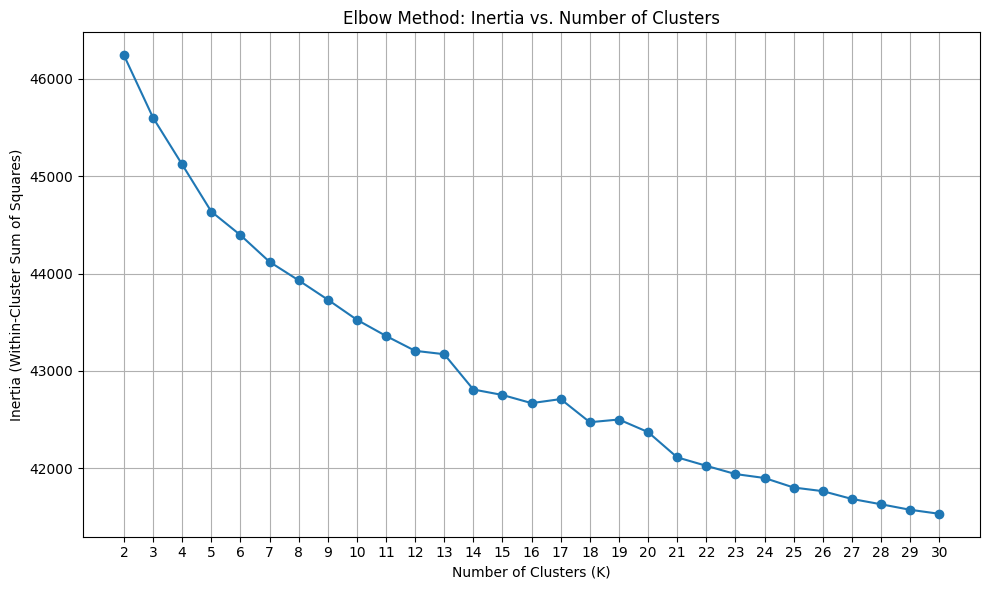

In [90]:
# your code answer here
inertias = []
K_range = range(2, 31)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(X_pca)
    inertias.append(kmeans.inertia_)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(K_range, inertias, marker='o')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia (Within-Cluster Sum of Squares)")
plt.title("Elbow Method: Inertia vs. Number of Clusters")
plt.grid(True)
plt.xticks(K_range)
plt.tight_layout()
plt.show()

# Q5 Gaussian Mixture Models

**Q5.1** As with the K-means above, cluster the movies based on the features that were extracted via PCA in a previous step. Set $K=20$. Add the predicted cluster into the dataframe as a new column called `cluster_gmm`. Print out the elements of a single cluster of your choice from the dataframe.

In [91]:
# Your code answer here
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=20)
gmm.fit(X_pca)

gmm_preds = gmm.predict(X_pca)

df["cluster_gmm"] = y_preds

cluster_id = 3
cluster_data = df[df["cluster_gmm"] == cluster_id]
cluster_data

,title,overview,genres,proc_genres,one_hot_genres,proc_overview,overview_len,one_hot_overview,overview_pca,cluster_kmeans,cluster_gmm
14,Man of Steel,A young boy learns that he has extraordinary p...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",Fantasy,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, ...","[a, young, boy, learns, that, he, has, extraor...",60,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.18432446581771253, 0.13454829200563037, 0....",3,3
17,Pirates of the Caribbean: On Stranger Tides,Captain Jack Sparrow crosses paths with a woma...,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 28, ""...",Action,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[captain, jack, sparrow, crosses, paths, with,...",74,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.8855260356774474, -0.3706300795248924, 0.1...",3,3
34,Monsters University,A look at the relationship between Mike and Su...,"[{""id"": 16, ""name"": ""Animation""}, {""id"": 10751...",Family,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, ...","[a, look, at, the, relationship, between, mike...",23,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.04497474325316022, -0.44353539325256947, 0....",3,3
49,Prince of Persia: The Sands of Time,A rogue prince reluctantly joins forces with a...,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",Adventure,"[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[a, rogue, prince, reluctantly, joins, forces,...",45,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.7090853243246322, -0.3637397348135056, 0.3...",3,3
62,"The Chronicles of Narnia: The Lion, the Witch ...","Siblings Lucy, Edmund, Susan and Peter step th...","[{""id"": 12, ""name"": ""Adventure""}, {""id"": 10751...",Adventure,"[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[siblings, lucy, edmund, susan, and, peter, st...",65,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.014797235067859911, -0.35304681406904326, 0...",3,3
...,...,...,...,...,...,...,...,...,...,...,...
4668,A True Story,Mike and Matt own nothing and share everything...,"[{""id"": 35, ""name"": ""Comedy""}]",Comedy,"[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[mike, and, matt, own, nothing, and, share, ev...",30,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.6625987268909955, -0.41763959474372175, 0....",3,3
4677,Mutual Appreciation,Alan is a musician who leaves a busted-up band...,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 35, ""name...",Comedy,"[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[alan, is, a, musician, who, leaves, a, busted...",42,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.7574360393154542, 0.015688913915044567, 0....",3,3
4679,Down Terrace,After serving jail time for a mysterious crime...,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 28, ""name...",Drama,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, ...","[after, serving, jail, time, for, a, mysteriou...",74,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.10615527727451254, -0.19374107235970636, 0...",3,3
4694,Pink Flamingos,Notorious Baltimore criminal and underground f...,"[{""id"": 27, ""name"": ""Horror""}, {""id"": 35, ""nam...",Horror,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[notorious, baltimore, criminal, and, undergro...",36,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.6444839368243754, -0.330478808924122, 0.28...",3,3


**Q4.2** Does this clustering seem alright to you (based on your movie watching history)? Are there movies that go well together and movies that don't? How does this compare to K-Means Clustering?

The big-budget adventure movies go well together. But the Pixar movies, horror, drama and big budget movies being together seems off. The KMeans cluster had a better selection with more similar movies and a few outliers, relative to the GMM which is more of a moxed bag.

**Q4.3** Let's check out the size of the clusters. Create a double bar plot (**as you did in the last assignment**) showing the different sizes of the clusters.

*Hint: you may want to consider `df.value_counts()` if you're unfamiliar.*

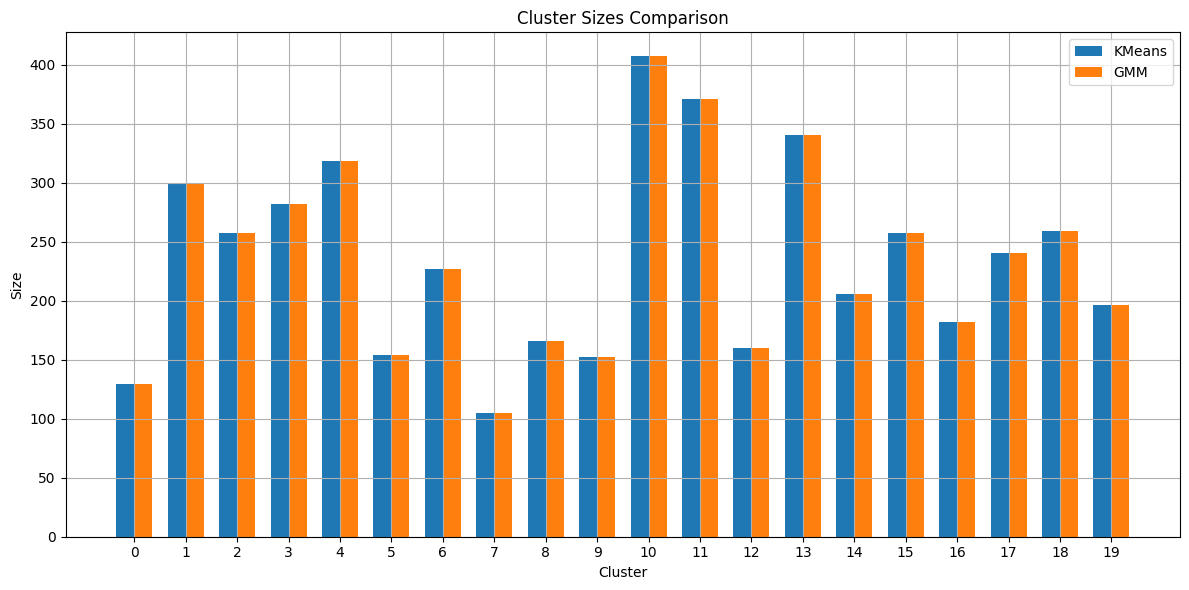

In [94]:
kmeans_counts = df["cluster_kmeans"].value_counts().sort_index()
gmm_counts = df["cluster_gmm"].value_counts().sort_index()

clusters = sorted(set(kmeans_counts.index).union(set(gmm_counts.index)))

kmeans_sizes = [kmeans_counts.get(cluster, 0) for cluster in clusters]
gmm_sizes = [gmm_counts.get(cluster, 0) for cluster in clusters]

# Create an array for the x-axis positions
x = np.arange(len(clusters))
width = 0.35

# Plotting the bars
plt.figure(figsize=(12, 6))
plt.bar(x - width/2, kmeans_sizes, width, label='KMeans')
plt.bar(x + width/2, gmm_sizes, width, label='GMM')

# Add labels, title, and legend
plt.xlabel('Cluster')
plt.ylabel('Size')
plt.title('Cluster Sizes Comparison')
plt.xticks(x, clusters)
plt.legend()
plt.grid(True)
plt.tight_layout()
# Show the plot
plt.show()

**Q4.4** Do you see a significant difference in the sizes of the clusters? Which is more uniform? Any thought on why?

No, there is no differences in the sizes of the clusters. Both methods produced nearly uniform clusters.
This suggests that the PCA-reduced feature space is evenly distributed and lacks extreme density regions, leading to both algorithms assigning a balanced number of samples per cluster.
Therefore, cluster size cannot be used to prefer one method over the other.

# Q6: A very simple recommender system

One useful thing that clustering is often used for (though at a much greater complexity) is in **recommender systems**. These are systems with users and items (movies, files, documents, etc.), where new items are shown to the user based on what they've previously interacted with, and possibly also on the behaviour of other users.

**Q6.1** Assume your dentist has just watched the movie Avatar and asks you for a recommendation. Lucky for you, you just finished this assignment. Using the cluster indices of the movie Avatar for both the K-means and GMM methods, print out suggestions for new movies.

In [97]:
prev_watch = "Avatar"

# Find the row for Avatar
avatar_row = df[df["title"].str.lower() == prev_watch.lower()]

# Making sure it exists
if not avatar_row.empty:
    # find what cluster index Avatar falls into for k-means
    cluster_kmeans = avatar_row["cluster_kmeans"].values[0]
    # find what cluster index Avatar falls into for gmm
    cluster_gmm = avatar_row["cluster_gmm"].values[0]

    print(f"Avatar is in KMeans cluster {cluster_kmeans}")
    print(f"Avatar is in GMM cluster {cluster_gmm}")

    # Get similar movies from each cluster (excluding Avatar itself)
    rec_kmeans = df[(df["cluster_kmeans"] == cluster_kmeans) & (df["title"] != prev_watch)]
    rec_gmm = df[(df["cluster_gmm"] == cluster_gmm) & (df["title"] != prev_watch)]

    #print out similar movies
    print("\n Recommendations based on KMeans cluster:")
    print(rec_kmeans["title"].head(10).to_string(index=False))

    print("\n Recommendations based on GMM cluster:")
    print(rec_gmm["title"].head(10).to_string(index=False))
else:
    print("Movie 'Avatar' not found in the dataset.")

Avatar is in KMeans cluster 16
Avatar is in GMM cluster 16

 Recommendations based on KMeans cluster:
         Jupiter Ascending
 The Sorcerer's Apprentice
          The Green Hornet
                Real Steel
                The Island
           Minority Report
             Casino Royale
Die Hard: With a Vengeance
                     Dredd
             Mars Attacks!

 Recommendations based on GMM cluster:
         Jupiter Ascending
 The Sorcerer's Apprentice
          The Green Hornet
                Real Steel
                The Island
           Minority Report
             Casino Royale
Die Hard: With a Vengeance
                     Dredd
             Mars Attacks!


**Q6.2** Are any of the two recommender systems any good? Would you use them if your real dentist asks for a movie suggestion?

*Your text answer here*

**Q6.3** How would you try making the recommender systems better?

*Your text answer here*

**Q6.4** Say your dentist likes the movies you suggested and has watched a few more since you met him last. How would you incorporate this fact (recommendation based on multiple movies) into your suggestions?

*Your text answer here*

**Q6.5** An alternative method for recommendations is to use your encoded movie-feature vectors (in this case your overview+PCA vector) in order to find out what movie may be most similar to the current one. In the case of K-Means and GMMs, "similarity" referred to Euclidean distance. However, in this exercise, we will use *cosine similarity*, which is another very common similarity measure, and is related to the angle between two vectors. It is defined as:

$$sim(v_1, v_2)=\frac{v_1\cdot v_2}{||v_1||\cdot||v_2||}$$

Where $v_1$ and $v_2$ are vectors and the operator $||\cdot||$ is the norm of the vector. The function ranges from $[-1,1]$ (where 1 means that the vectors point in the same direction).

Define an appropriate function `cosine_sim`. Add a column called `cos_sim_to_avatar` in the df and print out the head of the df, sorted by the similarity. What movies would you recommend now? Is this better than the clustering methods?

In [ ]:
def cosine_sim(v1, v2):
    return ...

# get overview_pca encoding of previously watched film
prev_watch_enc = ...

sims = [] # set up place to store similarities
for i, row in df.iterrows():
    sims.append(...)

df["cos_sim_to_avatar"] = ...
df = df.sort_values(...) # sort df
df # print to verify

*Your text answer here*

# Q7 Unsupervised Learning as a Tool

At the end of this brief forey into natural language processing, we will end with an interesting task: can a machine predict the genre of a movie based purely on the first 10 words of its overview?

First, the following cell shuffles the dataset and splits it into a training and test set. The random seed and random state ensure that the train and test samples are the same for you all the time, and *probably* your classmates too. You can verify this by printing out the dataframes and checking it for yourself.

In [ ]:
np.random.seed(0)
n_train = int(0.8*len(df))
df_shuffle = df.sample(frac=1, random_state=42).reset_index(drop=True)
df_train = df_shuffle[:n_train].reset_index(drop=True)
df_test = df_shuffle[n_train:].reset_index(drop=True)
print(len(df_train), len(df_test))

## Train, test, evaluate

Using a supervised learning method of your choice, try predicting the genre of a movie from the overview. The way you preprocess your data is up to you, and you can take inspiration from the above exercises (e.g. PCA on the one-hot encodings as input, one-hot label encodings as output). There are a number of hyperparameters you can choose depending on your selected method (number of words in your overview, number of dimensions, number of clusters, hyperparameters of your supervised model...), thus, make sure to perform hyperparameter optimization in some way (grid-search, fine-tuning, etc). Once you are happy with how your model is performing, **print out the train_score (accuracy$\in[0,1]$), test_score (accuracy$\in[0,1]$), mean training time (in seconds), and mean inference time (in seconds) of your model**.

If you are already excited about neural networks, you may also choose to use that as your supervised method. The easiest way to do it is with sklearn's `MLPClassifier` module. The main hyperparameter you would need to tune is the architecture of your model -- how many hidden layers, and how large is each one. For this task, in order to get best performance, you do not necessarily need an MLP (multi-layer perceptron) but feel free to experiment.

*Hint: the `train_and_eval` function from the last assignment should be of great help here*

In [ ]:
# your code here: feel free to add extra cells

Write a paragraph of ~150 words about how you went about selecting and tuning your model, and how you may want to make improvements to your model if you were to continue working on this. Plots are very good but not strictly necessary (i.e. try to add plots if you can).

*Your text answer here*

# BONUS

If you are happy with your score and wish to see how well it is doing with respect to other people (a sort of mini-competition), fill out the following form with the train_score (accuracy$\in[0,1]$), test_score (accuracy$\in[0,1]$), mean training time (in seconds), and mean inference time (in seconds) of your model, as well as what method you use. You can submit as many times before the deadline as you wish. Your final results will be correlated with your submission in order to validate your results (if we cannot validate them, they will be immediately disqualified).

[FORM HERE](https://forms.gle/rXRtXScABH5oDLRWA)